
# Simulation of Poiseuille Flow with LBM

### Simualtion Parameters:

* \rho =10^3 kg/m^3
* g= 10 m/s^2
* w = 6 * 10^-4
* \nu = 10^-6 m^2/s
* dx = 1*10^-5
* dt = 1.667*10^-6
     ######    Re = u w / /nu = 1250

### Lattice Parameters:

* w*= 60
* dx* = 1
* \rho* = 1
* dt* = 1
* g* = 2.78*10^-6

     ######     Cu = dx/dt = 5.9998




### Step 1: Defining Parameters:

In [19]:
from numpy import *; from numpy.linalg import *
import matplotlib.pyplot as plt; from matplotlib import cm
import numpy

maxIter = 200000 # Total number of time iterations.
Re      = 1250.0  # Reynolds number.
nx = 30; ny = 60; ly=ny-1.0; q = 9 # Lattice dimensions and populations.
cx = nx/4; cy=ny/2; r=ny/9;          # Coordinates of the cylinder.
uLB     = 0.34729                     # Velocity in lattice units.
nulb    = uLB*ny/Re; omega = 1.0 / (3.*nulb+0.5); # Relaxation parameter.
cu=5.9998                               # Velocity conversion factors

### Step2: Defining Lattice Constants and Forces

In [20]:
c = array([(x,y) for x in [0,-1,1] for y in [0,-1,1]]) # Lattice velocities.
t = 1./36. * ones(q)                                   # Lattice weights.
t[asarray([norm(ci)<1.1 for ci in c])] = 1./9.; t[0] = 4./9.
f = zeros((2,nx,ny))                                   # Defining force component
f[0,:,:] = 0.00000278*ones((nx,ny))                    #  force value along x-axis

### Step 3: Functin Definition:

In [21]:
sumpop = lambda fin: sum(fin,axis=0) # Helper function for density computation.
def equilibrium(rho,u):              # Equilibrium distribution function.
    cu   = 3.0 * dot(c,u.transpose(1,0,2))
    usqr = 3./2.*(u[0]**2+u[1]**2)
    feq = zeros((q,nx,ny))
    for i in range(q): feq[i,:,:] = rho*t[i]*(1.+cu[i]+0.5*cu[i]**2-usqr)

    return feq

### Step 4: Boundy Condition:

In [22]:
noslip = [c.tolist().index((-c[i]).tolist()) for i in range(q)] # No slip condition

i1 = arange(q)[asarray([ci[0]<0  for ci in c])] # Unknown on right wall.
i2 = arange(q)[asarray([ci[0]==0 for ci in c])] # Vertical middle.

def function1():                              # No Slip Boundry 
    retrunedlist  = zeros((nx,ny), dtype=bool)
    for  j  in range (  ny ):
        val  = True

        if (not( j== 0  or  j==  ny-1 )):
            continue

        for  i  in range  (nx):
            retrunedlist[i,j]  =  val

    return retrunedlist

### Step 5: Intial Value: 

In [23]:
e= zeros((q,2,nx,ny))
p= zeros((q,nx,ny))
p2= zeros((q,2,nx,ny))
f2 = zeros((q,nx,ny))   # Source Term (Si)
feq= zeros((q,nx,ny))

for i in range (q): feq[i,:,:]= t[i]*ones((nx,ny))
fin = feq.copy()


### Step 6: Main Time Loop:

In [24]:
for time in range(maxIter):
    fin[i1,-1,:] = fin[i1,-2,:] # Right wall: outflow condition.
    rho = sumpop(fin)           # Calculate macroscopic density and velocity.
    u = dot(c.transpose(), fin.transpose((1,0,2)))/rho + f/(2* rho)
    
    rho[0,:] = 1./(1.-u[0,0,:]) * (sumpop(fin[i2,0,:])+2.*sumpop(fin[i1,0,:]))
    
     #### Source Term Si #####
    for i in range(q): e[i, 0, :, :] = subtract(c[i, 0], u[0, :, :])
    for i in range(q): e[i, 1, :, :] = subtract(c[i, 1], u[1, :, :])
    for i in range(q): p[i, :, :] = c[i, 0] * u[0, :, :] + c[i, 1] * u[1, :, :]
    for i in range(q): p2[i, 0, :, :] = p[i, :, :] * c[i, 0]
    for i in range(q): p2[i, 1, :, :] = p[i, :, :] * c[i, 1]
    z2 = e + 3*p2
    for i in range(q): f2[i, :, :] = (1-0.5*omega)*t[i]*3*(z2[i, 0, :, :] * f[0, :, :] + z2[i, 1, :, :] * f[1, :, :])
    
    
    feq = equilibrium(rho,u) 
    fout = fin - omega * (fin - feq)+ f2   # Collision step.

    for i in range(q): fout[i,function1()] = fin[noslip[i],function1()] # Appling Boundry Condition
    for i in range(q): # Streaming step.
        fin[i,:,:] = roll(roll(fout[i,:,:],c[i,0],axis=0),c[i,1],axis=1)
   
    #if (time%100==0):                                                # Visualization, If needed Remove (#).   
        #plt.clf(); plt.imshow(sqrt(u[0]**2+u[1]**2).transpose(),cmap=cm.Reds)
        #plt.savefig("vel."+str(time/100).zfill(4)+".png")

### Plotting Velocity Component:

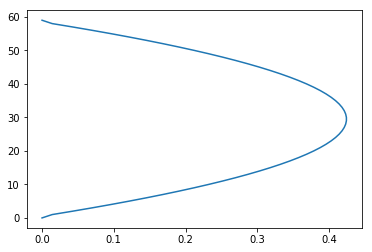

In [25]:
x1= [i for i in range(ny)]
y2= cu*u[0,10,:]           # Velocity componant along x-axis in one sectin ( here section 10 is selectid) mutplide by Velocity conversion factors.
plt.plot(y2,x1 )
plt.show()

### Plotting the theoretical value of velocity in Lattice point in Poiseuille Flow:

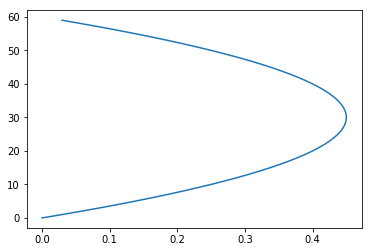

In [26]:
u2 = zeros((ny))                      # u2 is the velocity sete
for i in range(ny): u2[i] = -(10000 /(2*1000*10**-6))*((((ny / 2) - i) * 10**-5) ** 2 - (ny * 10**-5 / 2)**2)
plt.plot(u2,x1 )
plt.show()